In [1]:
%load_ext autoreload
%autoreload 2

# Maximum likelihood, Maximum a posteriori and Bayesian inference estimates of distribution parameters

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

import mle_map_bayes as mmb

from plotting_functions import *

%matplotlib inline

## Part 1: Normal distribution

In [3]:
# generate data
num_samples = 50
mu_true = 0
var_true = 1
sigma_true = np.sqrt(var_true)
x = mu_true + np.random.randn(num_samples) * sigma_true

### Maximum Likelihood Estimation

In [4]:
# ML estimate
mu_mle, var_mle = mmb.ml_estim_normal(x)

print('estimated mean: {:.5}'.format(mu_mle))
print('estimated sigma**2: {:.5}'.format(var_mle))

estimated mean: 0.12848
estimated sigma**2: 0.94006


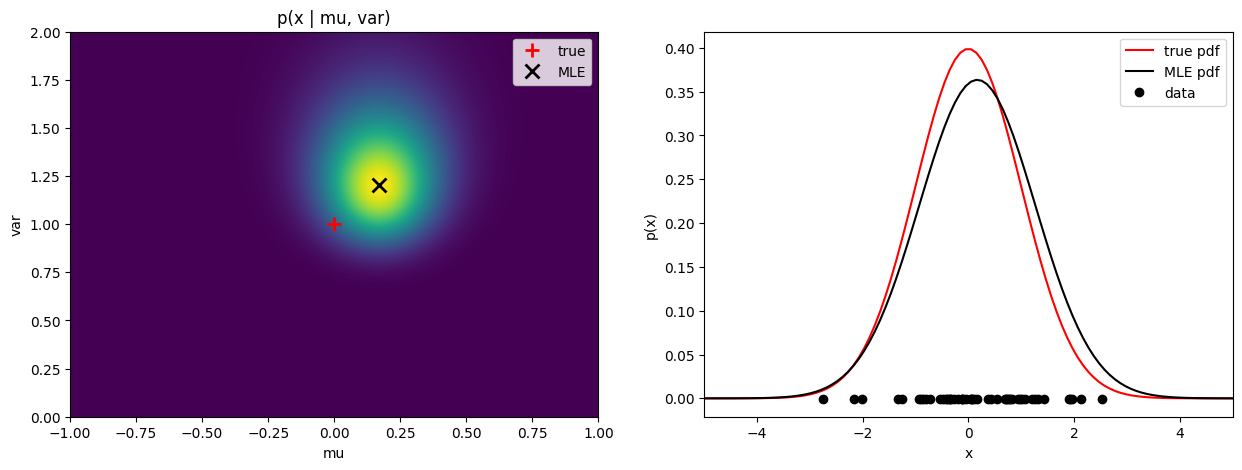

In [36]:
# plot the likelihood
# NOTICE: this works only for small num_samples (<=500), otherwise one gets zero everywhere due to numerical errors!
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_likelihood(x, -1.0, 1.0, 0, 2)
plt.plot([mu_true], [var_true], 'r+', markeredgewidth=2, markersize=10)
plt.plot([mu_mle], [var_mle], 'kx', markeredgewidth=2, markersize=10)
plt.legend(['true', 'MLE'])

# plot the estimated and true distributions
plt.subplot(1, 2, 2)
span_x = sigma_true * 5
z = np.linspace(mu_true - span_x, mu_true + span_x, 100)
p_true = norm.pdf(z, mu_true, sigma_true)
p_mle = norm.pdf(z, mu_mle, np.sqrt(var_mle))
plt.plot(z, p_true, 'r-')
plt.plot(z, p_mle, 'k-')
plt.plot(x, [-0.001] * x.size, 'ko')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim([mu_true - span_x, mu_true + span_x])
plt.legend(['true pdf', 'MLE pdf', 'data'])
plt.savefig('mle_normal.png')

Estimated distributions with increasing number of samples:

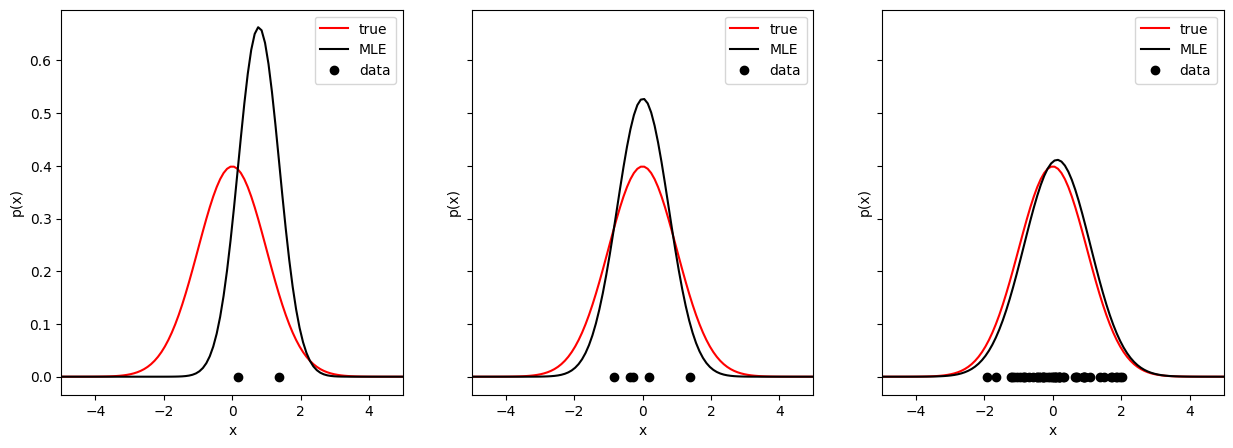

In [12]:
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15, 5))

span_x = sigma_true * 5
z = np.linspace(mu_true - span_x, mu_true + span_x, 100)
p_true = norm.pdf(z, mu_true, sigma_true)

for (plot_pos, num) in zip((0, 1, 2), (2, 5, 50)):
    data = x[:num]
    mu_mle_part, var_mle_part = mmb.ml_estim_normal(data)
    
    # plot the estimated and true distributions
    plt.sca(axes[plot_pos])
    p_mle = norm.pdf(z, mu_mle_part, np.sqrt(var_mle_part))
    plt.plot(z, p_true, 'r-')
    plt.plot(z, p_mle, 'k-')
    plt.plot(data, [-0.001] * data.size, 'ko')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.xlim([mu_true - span_x, mu_true + span_x])
    plt.legend(['true', 'MLE', 'data'])

plt.savefig('mle_normal_varying_dataset_size.png')

### MAP

In [8]:
# MAP prior settings
mu0 = mu_true
nu = 2
alpha = 5
beta = var_true*(alpha+1.5)

Plot the distribution using the provided `plot_prior` function together with its mode \[`mu_prior`, `var_prior`\].

Experiment with different settings of $\mu_0, \nu, \alpha, \beta$ to get the feeling for how each of the parameters influences the prior. You will need this understanding later when we will be building a classifier using the MAP estimate.

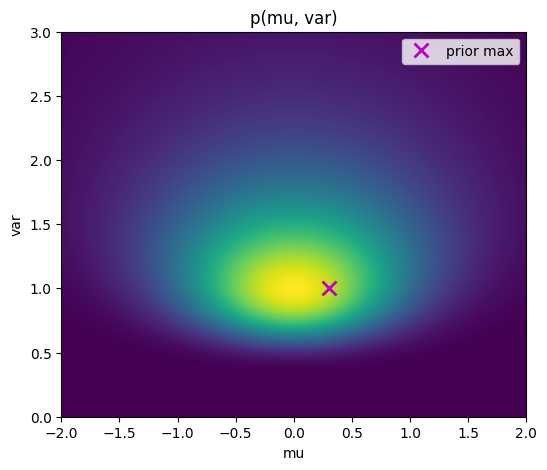

In [9]:
# the values of the peak of the prior distribution
mu_prior = 0.3
var_prior = 1

# plot the prior
plot_margin = 2
plt.figure(figsize=(6, 5))
prior_grid = plot_prior(mu0, nu, alpha, beta, mu0 - plot_margin, mu0 + plot_margin, 0, 3)

plt.plot([mu_prior], [var_prior], 'mx', markeredgewidth=2, markersize=10)
plt.legend(['prior max'])
plt.savefig('map_prior_normal.png')

In [10]:
# MAP estimate
mu_map, var_map = mmb.map_estim_normal(x, mu0, nu, alpha, beta)

print('estimated mean: {:.5}'.format(mu_map))
print('estimated sigma**2: {:.5}'.format(var_map))

estimated mean: 0.12354
estimated sigma**2: 0.95293


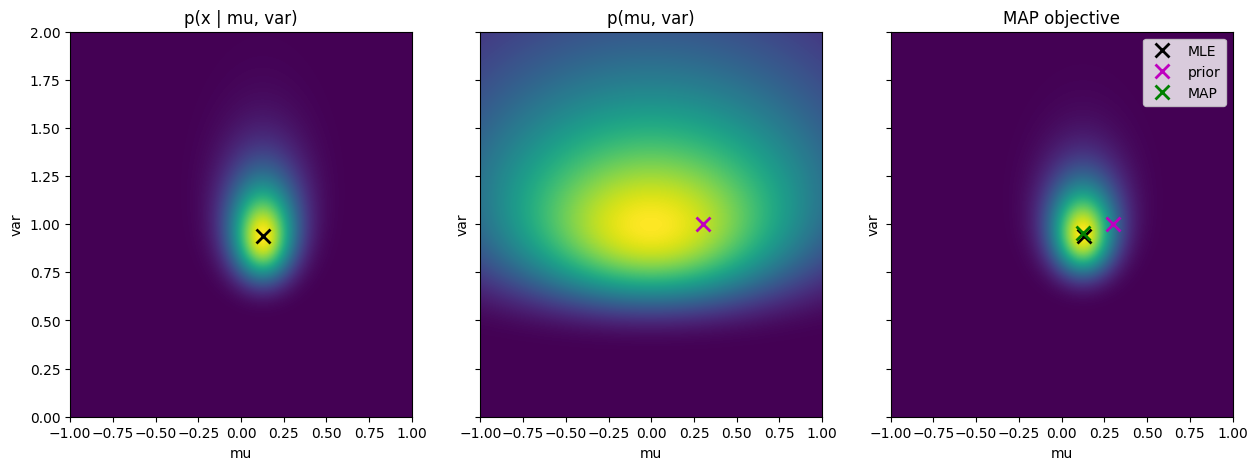

In [13]:
# plot the likelihood, prior and MAP objective together with the MLE and MAP estimates and the prior maximum.
mu_min = -1
mu_max = 1
var_min = 0
var_max = 2

fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15, 5))
plt.sca(axes[0])
plot_likelihood(x, mu_min, mu_max, var_min, var_max)
plt.plot([mu_mle], [var_mle], 'kx', markeredgewidth=2, markersize=10)

plt.sca(axes[1])
plot_prior(mu0, nu, alpha, beta, mu_min, mu_max, var_min, var_max)
plt.plot([mu_prior], [var_prior], 'mx', markeredgewidth=2, markersize=10)

# The following plot is NOT a probability distribution!!! It is not normalised to sum up to one!
plt.sca(axes[2])
plot_MAP_objective(x, mu0, nu, alpha, beta, mu_min, mu_max, var_min, var_max)
plt.plot([mu_mle], [var_mle], 'kx', markeredgewidth=2, markersize=10)
plt.plot([mu_prior], [var_prior], 'mx', markeredgewidth=2, markersize=10)
plt.plot([mu_map], [var_map], 'gx', markeredgewidth=2, markersize=10)
plt.legend(['MLE', 'prior', 'MAP'])
plt.savefig('mle_map_prior_comparison_normal.png')

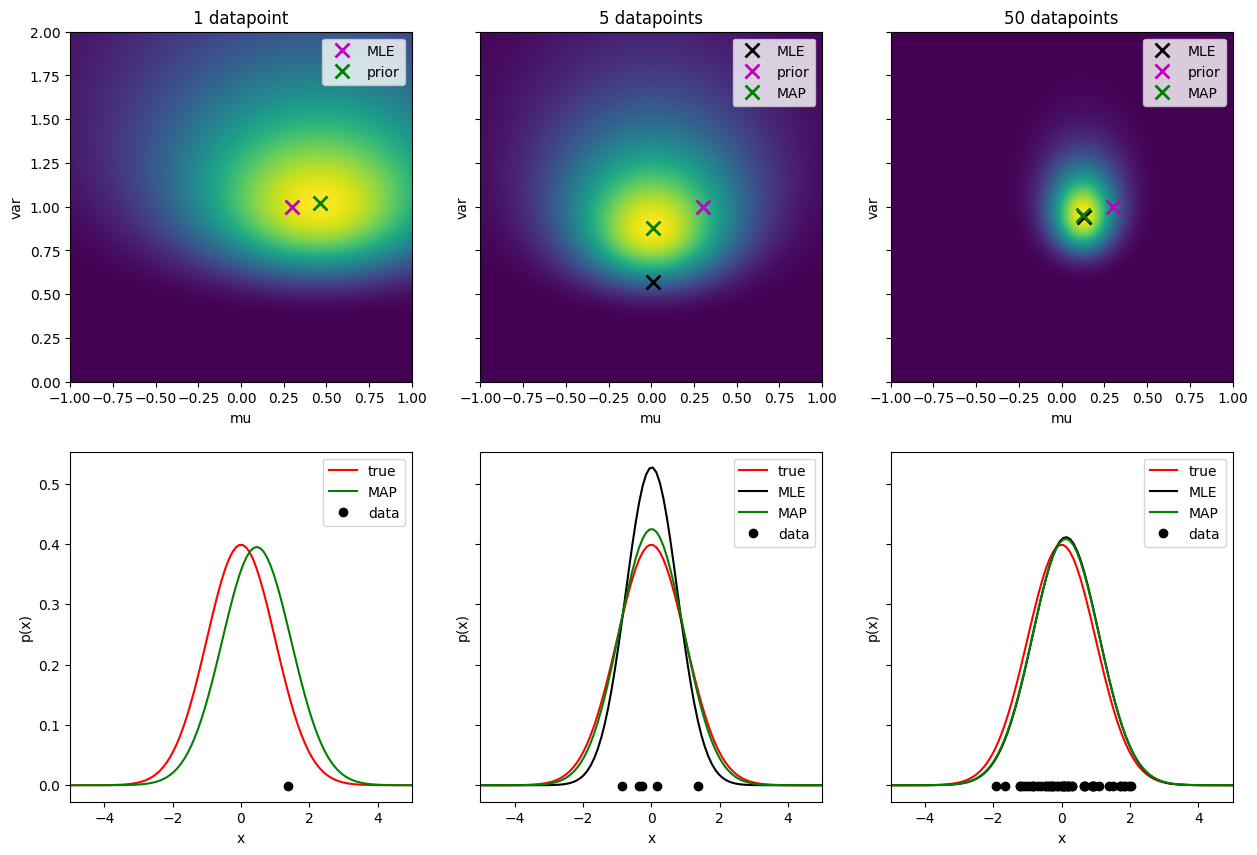

In [14]:
# Plot the MLE and MAP estimates for different dataset sizes (e.g. 1, 5, 50):
#   - plot the MAP objective with the estimates and prior indicated,
#   - plot also the estimated distributions for each dataset size.

mu_min = -1
mu_max = 1
var_min = 0
var_max = 2


fig, axes = plt.subplots(2, 3, sharey='row', figsize=(15,10))
for (plot_pos, num) in zip((0, 1, 2), (1, 5, 50)):
    data = x[:num]
    mu_map_part, var_map_part = mmb.map_estim_normal(data, mu0=mu0, nu=nu, alpha=alpha, beta=beta)
    mu_mle_part, var_mle_part = mmb.ml_estim_normal(data)
    
    plt.sca(axes[0, plot_pos])
    plot_MAP_objective(data, mu0, nu, alpha, beta, mu_min, mu_max, var_min, var_max)
    if num > 1:
        plt.plot([mu_mle_part], [var_mle_part], 'kx', markeredgewidth=2, markersize=10)
    plt.plot([mu_prior], [var_prior], 'mx', markeredgewidth=2, markersize=10)
    plt.plot([mu_map_part], [var_map_part], 'gx', markeredgewidth=2, markersize=10)
    plt.xlabel('mu')
    plt.ylabel('var')
    plt.legend(['MLE', 'prior', 'MAP'])
    plt.title('{:d} datapoint{:s}'.format(num, '' if num == 1 else 's'))
    
    # plot the estimated and true distributions
    plt.sca(axes[1, plot_pos])
    span_x = sigma_true * 5
    z = np.linspace(mu_true - span_x, mu_true + span_x, 100)
    p_true = norm.pdf(z, mu_true, sigma_true)
    if var_mle_part > 0:
        p_mle = norm.pdf(z, mu_mle_part, np.sqrt(var_mle_part))
    p_map = norm.pdf(z, mu_map_part, np.sqrt(var_map_part))
    plt.plot(z, p_true, 'r-')
    if var_mle_part > 0:
        plt.plot(z, p_mle, 'k-')
    plt.plot(z, p_map, 'g-')
    plt.plot(data, [-0.001] * data.size, 'ko')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.xlim([mu_true - span_x, mu_true + span_x])
    if var_mle_part > 0:
        leg = plt.legend(['true', 'MLE', 'MAP', 'data'])
    else:
        leg = plt.legend(['true', 'MAP', 'data'])
        
plt.savefig('mle_map_normal_dataset_sizes.png')

### Bayesian inference

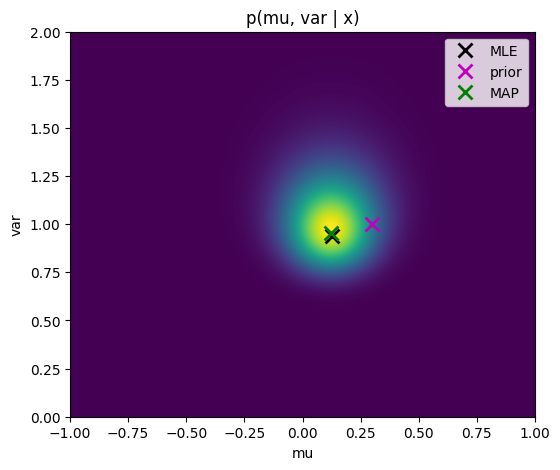

In [15]:
# plot the posterior probability and mark the MLE, MAP and maximum prior solutions

# assumes the same data and parameters as for MAP estimate
# assumes the MLE and MAP estimates are already computed

plot_margin = 1
plt.figure(figsize=(6, 5))
prior_grid = plot_posterior_normal(x, mu0, nu, alpha, beta, mu0 - plot_margin, mu0 + plot_margin, 0, 2)
plt.plot([mu_mle], [var_mle], 'kx', markeredgewidth=2, markersize=10)
plt.plot([mu_prior], [var_prior], 'mx', markeredgewidth=2, markersize=10)
plt.plot([mu_map], [var_map], 'gx', markeredgewidth=2, markersize=10)
plt.legend(['MLE', 'prior', 'MAP'])
plt.savefig('bayes_posterior_normal.png')

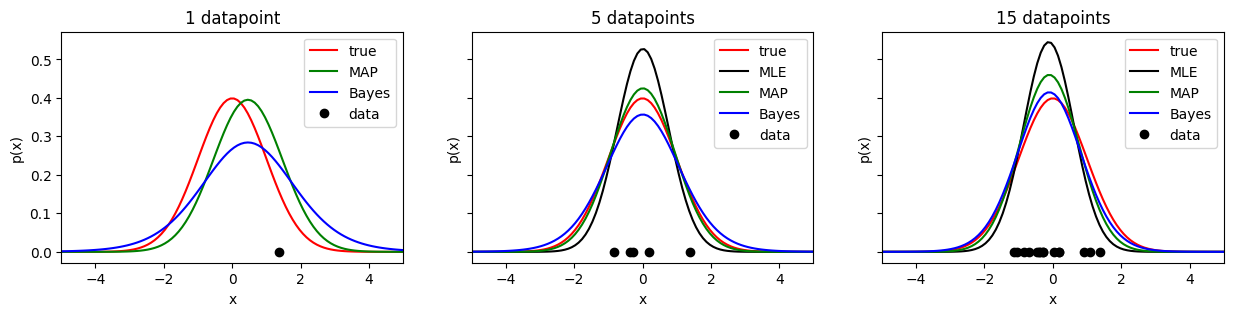

In [16]:
# predictive distribution and its comparison with MAP and MLE

fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15,3))

span_x = sigma_true * 5
z = np.linspace(mu_true - span_x, mu_true + span_x, 100)
p_true = norm.pdf(z, mu_true, sigma_true)

for (plot_pos, num) in zip((0, 1, 2), (1, 5, 15)):
    data = x[:num]
    mu_map_part, var_map_part = mmb.map_estim_normal(data, mu0=mu0, nu=nu, alpha=alpha, beta=beta)
    mu_mle_part, var_mle_part = mmb.ml_estim_normal(data)
    
    # plot the estimated and true distributions
    if var_mle_part > 0:
        p_mle = norm.pdf(z, mu_mle_part, np.sqrt(var_mle_part))
    p_map = norm.pdf(z, mu_map_part, np.sqrt(var_map_part))
    p_bayes = mmb.bayes_estim_pdf_normal(z, data, mu0, nu, alpha, beta)
    
    plt.sca(axes[plot_pos])
    plt.plot(z, p_true, 'r-')
    if var_mle_part > 0:
        plt.plot(z, p_mle, 'k-')
    plt.plot(z, p_map, 'g-')
    plt.plot(z, p_bayes, 'b-')
    plt.plot(data, [-0.001] * data.size, 'ko')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    if var_mle_part > 0:
        leg = plt.legend(['true', 'MLE', 'MAP', 'Bayes', 'data'])
    else:
        leg = plt.legend(['true', 'MAP', 'Bayes', 'data'])
    plt.xlim([mu_true - span_x, mu_true + span_x])
    plt.title('{:d} datapoint{:s}'.format(num, '' if num == 1 else 's'))

plt.savefig('mle_map_bayes_normal.png')

In [17]:
# add some outlier to the data (point not from the distribution)
x_noise = np.append(x, [7])

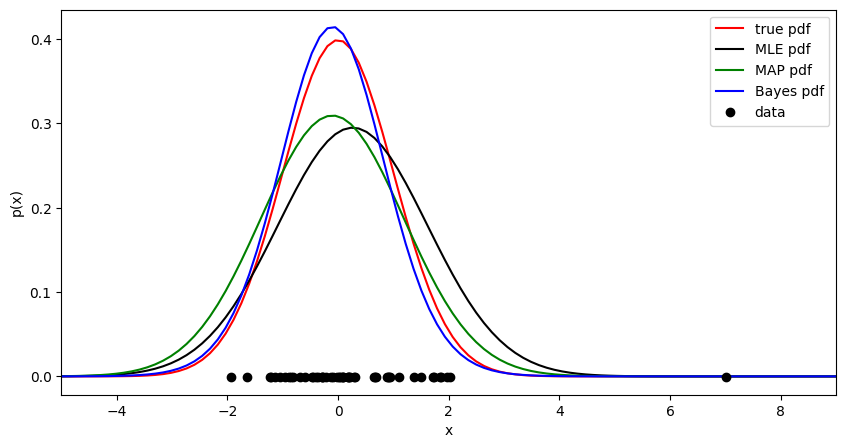

In [18]:
# plot the estimated and true distributions

plt.figure(figsize=(10, 5))
span_x = sigma_true * 5
z = np.linspace(mu_true - span_x, 9, 100)

mu_mle_noise, var_mle_noise = mmb.ml_estim_normal(x_noise)
mu_map_noise, var_map_noise = mmb.map_estim_normal(x_noise, mu0, nu, alpha, beta)

p_true = norm.pdf(z, mu_true, sigma_true)
p_mle = norm.pdf(z, mu_mle_noise, np.sqrt(var_mle_noise))
p_map = norm.pdf(z, mu_map_part, np.sqrt(var_map_noise))
p_bayes = mmb.bayes_estim_pdf_normal(z, data, mu0, nu, alpha, beta)
plt.plot(z, p_true, 'r-')
plt.plot(z, p_mle, 'k-')
plt.plot(z, p_map, 'g-')
plt.plot(z, p_bayes, 'b-')
plt.plot(x_noise, [-0.001] * x_noise.size, 'ko')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim([mu_true - span_x, 9])
leg = plt.legend(['true pdf', 'MLE pdf', 'MAP pdf', 'Bayes pdf', 'data'])

plt.savefig('noise.png')

## Part 2: Categorical distribution

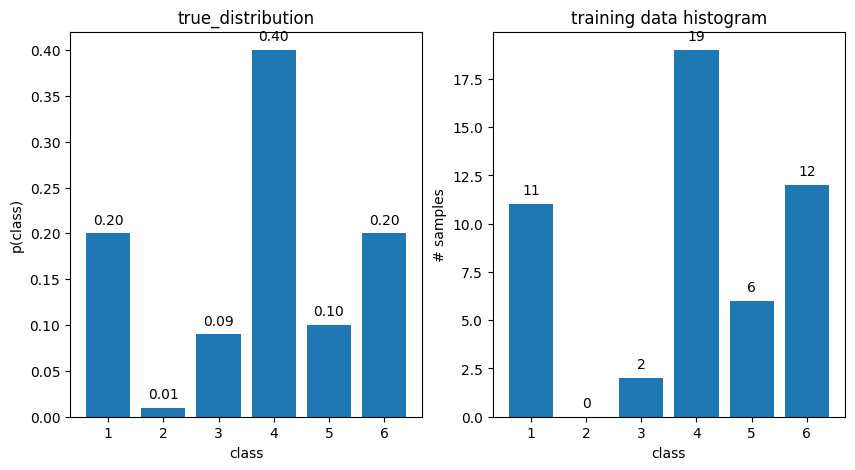

In [70]:
# generate some data
num_classes = 6
num_samples = 50
pk_true = [0.2, 0.01, 0.09, 0.4, 0.1, 0.2]
counts = np.random.multinomial(num_samples, pk_true)

# visualise the data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.sca(axes[0])
plot_categorical_distr(pk_true, 'true_distribution')

plt.sca(axes[1])
plot_categorical_hist(counts, 'training data histogram')

plt.savefig('categorical_data.png')

### MLE

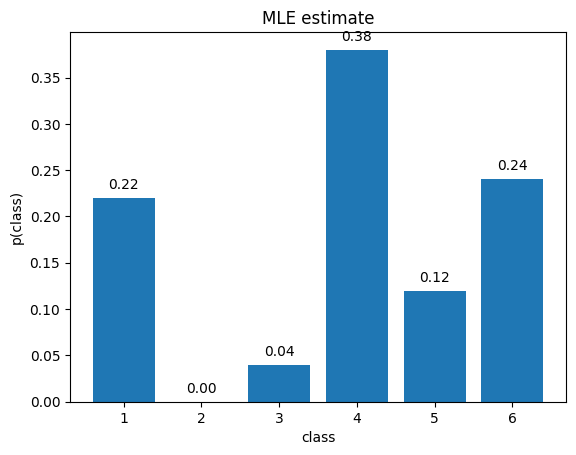

In [71]:
# compute the estimate
pc_mle = mmb.ml_estim_categorical(counts)

# visualise the estimate
plot_categorical_distr(pc_mle, 'MLE estimate')

plt.savefig('mle_categorical.png')

### MAP

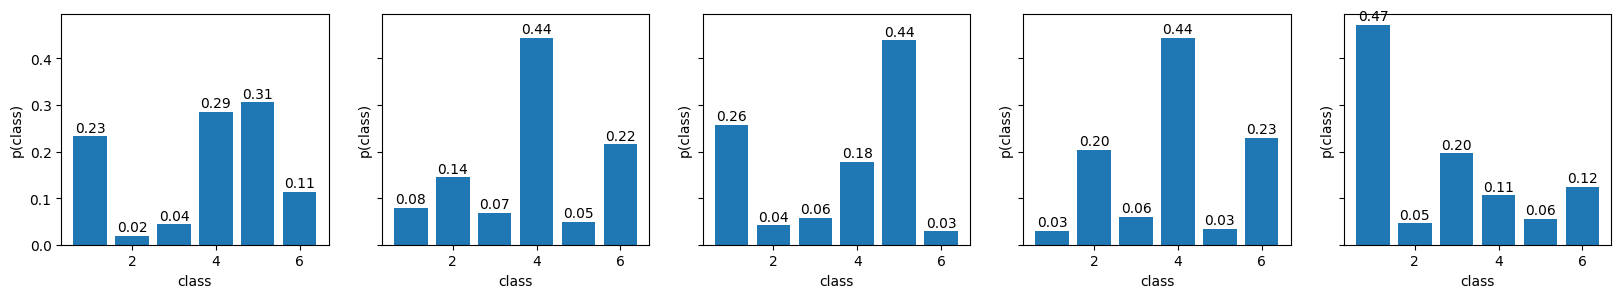

In [72]:
# random samples from the conjugate prior

alphas = np.repeat(1, num_classes) # a "flat" prior, the solution should revert back to MLE
prior_samples = np.random.dirichlet(alphas, 5)

fig, axes = plt.subplots(1, 5, figsize=(20, 3), sharey='row')
for i in range(5):
    plt.sca(axes[i])
    plot_categorical_distr(prior_samples[i], '')

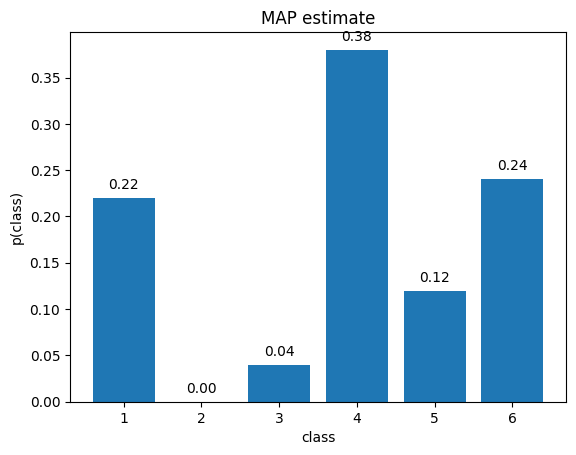

In [73]:
# compute the MAP estimate
pk_map = mmb.map_estim_categorical(counts, alphas)

plot_categorical_distr(pk_map, 'MAP estimate')
plt.savefig('map_categorical.png')

### Bayesian estimate

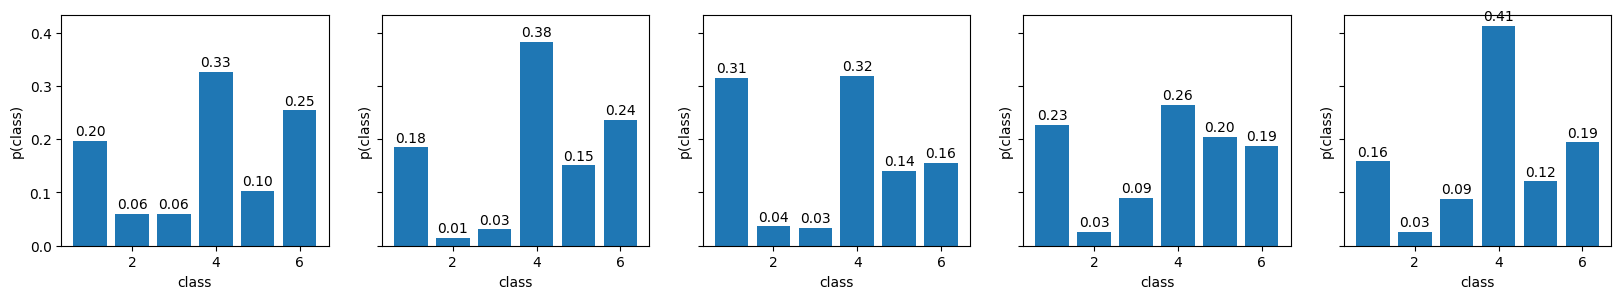

In [74]:
# compute the posterior
pc_posterior = mmb.bayes_posterior_params_categorical(counts, alphas)

# random samples from the posterior p(pc_posterior|counts)
posterior_samples = np.random.dirichlet(pc_posterior, 5)

fig, axes = plt.subplots(1, 5, figsize=(20, 3), sharey='row')
for i in range(5):
    plt.sca(axes[i])
    plot_categorical_distr(posterior_samples[i], '')
    
plt.savefig('bayes_posterior_categorical.png')

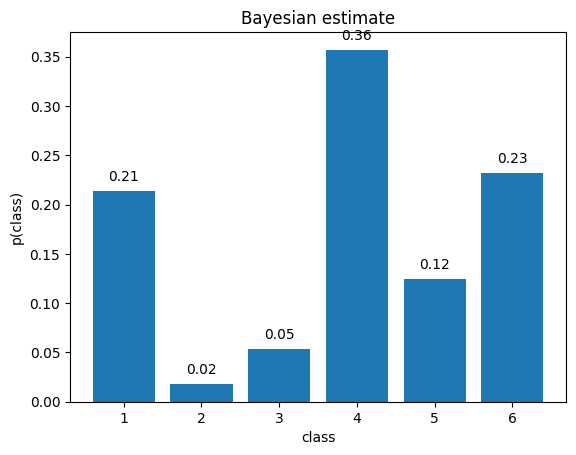

In [75]:
pc_bayes = mmb.bayes_estim_categorical(counts, alphas)

plot_categorical_distr(pc_bayes, 'Bayesian estimate')
plt.savefig('bayes_categorical.png')

## Part 3: Building a classifier

In [21]:
# load data
loaded_data = np.load("data_33rpz_mle_map_bayes.npz", allow_pickle=True)

alphabet = loaded_data["alphabet"]

tst = loaded_data["tst"].item()

trn_20 = loaded_data["trn_20"].item()
trn_200 = loaded_data["trn_200"].item()
trn_2000 = loaded_data["trn_2000"].item()

trn_sets = {'20': trn_20, '200': trn_200, '2000': trn_2000}

In [22]:
# classify the data using all three estimates

# select the training set
picked_set = '20' # your code probably won't work for '200' or '2000' due to numerical limitations
# feel free to search for the source of the numerical problems and come up with a workaround
# (it is doable relatively easily for '200')
trn_set = trn_sets[picked_set]

# computing LR feature vectors (training set)
x_train = mmb.compute_measurement_lr_cont(trn_set['images'])
labels_train = trn_set['labels']

# Splitting the trainning data into into classes
x_A = x_train[labels_train == 0]
x_C = x_train[labels_train == 1]

# NIG prior settings
mu0_A, nu_A, alpha_A, beta_A = 0,5,1,1
mu0_C, nu_C, alpha_C, beta_C = 670,1,1,1

x_test = mmb.compute_measurement_lr_cont(tst['images'])
q_mle, labels_mle, DA_mle, DC_mle = mmb.mle_Bayes_classif(x_test, x_A, x_C)
error_mle = mmb.classification_error(labels_mle, tst['labels'])
print('MLE classification error: {:.2f} %'.format(error_mle * 100))

q_map, labels_map, DA_map, DC_map = mmb.map_Bayes_classif(x_test, 
                                                          x_A, x_C,
                                                          mu0_A, nu_A, alpha_A, beta_A, 
                                                          mu0_C, nu_C, alpha_C, beta_C)
error_map = mmb.classification_error(labels_map, tst['labels'])
print('MAP classification error: {:.2f} %'.format(error_map * 100))

labels_Bayes = mmb.bayes_Bayes_classif(x_test, x_A, x_C,
                                       mu0_A, nu_A, alpha_A, beta_A, 
                                       mu0_C, nu_C, alpha_C, beta_C)
error_bayes = mmb.classification_error(labels_Bayes, tst['labels'])
print('Bayes classification error: {:.2f} %'.format(error_bayes * 100))


MLE classification error: 7.50 %
MAP classification error: 7.00 %
Bayes classification error: 6.00 %


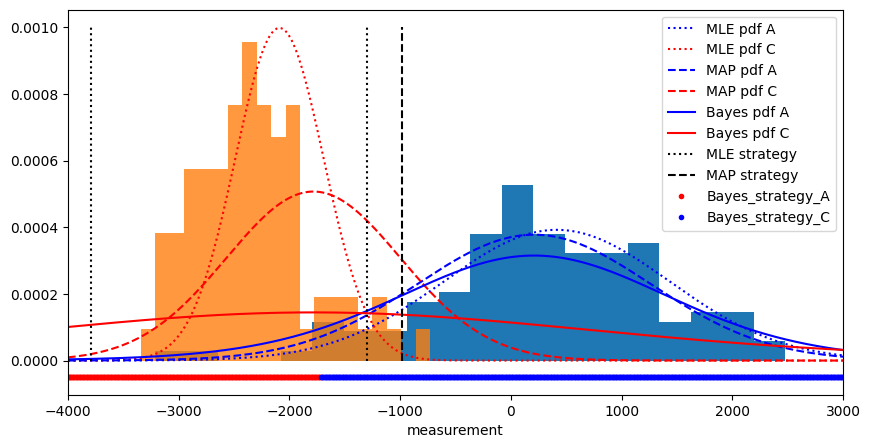

In [23]:
# visualise the estimates

plt.figure(figsize=(10, 5))
x_tst_all = mmb.compute_measurement_lr_cont(tst['images'])
x_A_tst = x_tst_all[tst['labels'] == 0]
x_C_tst = x_tst_all[tst['labels'] == 1]
plt.hist(x_A_tst, 20, density=True)
plt.hist(x_C_tst, 20, density=True, alpha=0.8)
z = np.linspace(-4000, 3000, 1000)

p_mle_A = norm.pdf(z, DA_mle['Mean'], DA_mle['Sigma'])
p_mle_C = norm.pdf(z, DC_mle['Mean'], DC_mle['Sigma'])
plt.plot(z, p_mle_A, 'b:', label='MLE pdf A')
plt.plot(z, p_mle_C, 'r:', label='MLE pdf C')

p_map_A = norm.pdf(z, DA_map['Mean'], DA_map['Sigma'])
p_map_C = norm.pdf(z, DC_map['Mean'], DC_map['Sigma'])
plt.plot(z, p_map_A, 'b--', label='MAP pdf A')
plt.plot(z, p_map_C, 'r--', label='MAP pdf C')

p_bayes_A = mmb.bayes_estim_pdf_normal(z, x_A, mu0_A, nu_A, alpha_A, beta_A)
p_bayes_C = mmb.bayes_estim_pdf_normal(z, x_C, mu0_C, nu_C, alpha_C, beta_C)
plt.plot(z, p_bayes_A, 'b-', label='Bayes pdf A')
plt.plot(z, p_bayes_C, 'r-', label='Bayes pdf C')

plt.plot([q_mle['t1'], q_mle['t1']], [0, 0.001], 'k:', label='MLE strategy')
plt.plot([q_mle['t2'], q_mle['t2']], [0, 0.001], 'k:', label=None)
plt.plot([q_map['t1'], q_map['t1']], [0, 0.001], 'k--', label='MAP strategy')
plt.plot([q_map['t2'], q_map['t2']], [0, 0.001], 'k--', label=None)

classif_bayes = mmb.bayes_Bayes_classif(z, x_A, x_C,
                                        mu0_A, nu_A, alpha_A, beta_A,
                                        mu0_C, nu_C, alpha_C, beta_C)
y_val = np.ones_like(z) * (-0.00005)
plt.plot(z[classif_bayes == 1], y_val[classif_bayes == 1], 'r.', label='Bayes_strategy_A')
plt.plot(z[classif_bayes == 0], y_val[classif_bayes == 0], 'b.', label='Bayes_strategy_C')

plt.xlim([-4000, 3000])
plt.legend()
plt.xlabel('measurement')
plt.savefig('mle_map_bayes_Bayes_classifier.png')